<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/Atividade_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o_Simples_Multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import scipy.stats as stat #biblioteca para estatística

In [ ]:
from ctypes import DEFAULT_MODE
#regressçao simples

#Roda OLS

##IMPORTAR PACOTE
import statsmodels.api as sm

# Análise preliminar - kc_house_data.**csv**

Considerando a base de dados **kc_house_data.csv** responda as questões de 1
a 6 abaixo:

Carregamento e Visualização Inicial dos Dados:

In [ ]:
data_df=pd.read_csv('kc_house_data.csv')

In [ ]:
#visualizar as 10 primeiras linhas do dataset

data_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,n,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,n,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,n,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,n,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,n,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
#Olhar os tipos de variáveis

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [ ]:
#visualização dos primeiros e últimos dados  e dimensão como o total de número de linha e colunhas
display(data_df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3222049055,20150116T000000,650000.0,3,1.75,2800,19386,1.0,y,4,...,8,1400,1400,1965,0,98198,47.3554,-122.324,3270,31450
9995,7352200100,20150224T000000,1360000.0,2,1.75,2620,14138,2.0,y,4,...,8,2120,500,1931,1991,98125,47.7142,-122.277,1830,8279
9996,3124059023,20150213T000000,1960000.0,3,1.75,3330,12566,1.0,y,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
9997,7352200025,20141013T000000,1190000.0,2,1.75,2080,8112,1.0,y,4,...,8,1040,1040,1939,1984,98125,47.7134,-122.277,2030,8408


Exploração e Análise Descritiva:

In [ ]:
data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


Amplitude, desvio padrão e variância

In [ ]:
def describe_new(data_df):
  df1 = data_df.describe()
  df1.loc['Amplitude']=df1.loc['max']-df1.loc['min']
  df1.loc['Variância']=df1.loc['std']*df1.loc['std']
  return df1

describe_new(data_df)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,1.335945e+04
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,2.731649e+04
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,6.600000e+02
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5.417500e+03
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7.848000e+03
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,1.037450e+04
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,8.712000e+05
Amplitude,9.841300e+09,7.625000e+06,11.000000,8.000000,11670.000000,1.650787e+06,2.500000,4.000000,4.000000,10.000000,8480.000000,4820.000000,115.000000,2015.000000,198.000000,0.621700,1.200000,5170.000000,8.705400e+05
Variância,8.201688e+18,1.421703e+11,0.839200,0.588111,830334.794179,2.028895e+09,0.262010,0.587886,0.443985,1.359325,657587.506392,203267.827474,783.383374,174582.267963,2909.859390,0.019613,0.019326,451939.142471,7.461907e+08


Preço (Price):

Média: A média do preço das casas é de $533,436.

Desvio Padrão: O desvio padrão é de aproximadamente $377,054.7, o que indica uma grande dispersão dos preços em relação à média.

Amplitude: A diferença entre o preço máximo e mínimo é de $7,625,000.

Variância: A variância é de aproximadamente $142,170,300, o que indica uma dispersão considerável em torno da média.

Área de Estar (sqft_living):
Média: A média da área de estar das casas é de 2053.09 pés quadrados.
Desvio Padrão: O desvio padrão é de aproximadamente 911.23 pés quadrados, indicando uma grande dispersão em relação à média.
Amplitude: A diferença entre a área de estar máxima e mínima é de 11670 pés quadrados.

Variância: A variância é de aproximadamente 830,334.79 pés quadrados, o que indica uma dispersão considerável em torno da média.
Com base nesses números, podemos concluir que tanto o preço quanto a área de estar das casas variam significativamente no conjunto de dados. Isso sugere que há uma grande diversidade de preços e tamanhos de propriedades incluídas no conjunto de dados. A ampla dispersão dos dados em relação à média pode ser influenciada por vários fatores, como localização, condição, idade da casa, entre outros.

In [ ]:
#valor modal (valor mais  frequente)

In [ ]:
filter_data = data_df.iloc[:, 2:21]
valor_modal = filter_data.mode()
valor_modal

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,350000.0,3.0,2.5,1400.0,5000.0,1.0,n,0.0,3.0,7.0,1010.0,0.0,2003,0.0,98038.0,47.5518,-122.29,1540.0,5000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Media e Mediana

In [ ]:
# Remover a coluna 'waterfront' do intervalo de colunas selecionadas
filtered_data = data_df.iloc[:, 2:21].drop(columns=['waterfront'])
media = filtered_data.mean()
media

price            533436.629263
bedrooms              3.361636
bathrooms             2.061806
sqft_living        2053.088209
sqft_lot          16036.957496
floors                1.432043
view                  0.238824
condition             3.446345
grade                 7.594459
sqft_above         1749.596360
sqft_basement       303.491849
yr_built           1967.274427
yr_renovated         91.642364
zipcode           98077.970297
lat                  47.559852
long               -122.214626
sqft_living15      1975.779178
sqft_lot15        13359.446945
dtype: float64

o preço médio das casas é de aproximadamente $533,436.63, a média de quartos é de cerca de 3.36, a média da área de estar em pés quadrados é de aproximadamente 2,053.09, e assim por diante. Isso pode ser útil para entender a distribuição média das características das casas no conjunto de dados.

In [ ]:

filtered_data = data_df.iloc[:, 2:21].drop(columns=['waterfront'])
mediana = filtered_data.median()
mediana

price            445838.0000
bedrooms              3.0000
bathrooms             2.0000
sqft_living        1890.0000
sqft_lot           7920.0000
floors                1.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1530.0000
sqft_basement         0.0000
yr_built           1969.0000
yr_renovated          0.0000
zipcode           98065.0000
lat                  47.5731
long               -122.2310
sqft_living15      1830.0000
sqft_lot15         7848.0000
dtype: float64

In [ ]:
data_df.isnull().sum() #verifica valores nulos

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Alterar object e tranformar em data

In [ ]:
data_df['date'] = pd.to_datetime(data_df["date"])

In [ ]:
data_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


A mediana é o valor que separa a metade superior da distribuição da metade inferior. Por exemplo, a mediana do preço das casas é de aproximadamente $445,838.00, o que significa que metade das casas no conjunto de dados têm preços abaixo desse valor e a outra metade têm preços acima desse valor. Da mesma forma, a mediana do número de quartos é 3, o que significa que metade das casas tem menos de 3 quartos e a outra metade tem mais de 3 quartos, e assim por diante para as outras variáveis

Resolução das Atividades


1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

In [ ]:
#Análise de correlação numerica]

num_house = data_df.select_dtypes(include=['float64', 'int64']).drop(columns=['id']) #filtrei as variáveis numéricas e removi o  ID que é apenas uma identificação única para cada observação

#calculo da matriz de correlação

corr= num_house.corr()

In [ ]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.299207,0.521193,0.702199,0.090720,0.276954,0.398731,0.044596,0.651100,0.607763,0.326087,0.036116,0.142752,-0.054596,0.297156,0.015786,0.583287,0.086809
bedrooms,0.299207,1.000000,0.539449,0.573915,0.028929,0.213565,0.090767,0.023435,0.360955,0.464872,0.323817,0.164852,0.027509,-0.146440,0.001749,0.110417,0.376492,0.019946
bathrooms,0.521193,0.539449,1.000000,0.764810,0.091268,0.494247,0.205681,-0.089029,0.660915,0.686311,0.311352,0.479104,0.070821,-0.204979,0.027687,0.217447,0.579341,0.099278
sqft_living,0.702199,0.573915,0.764810,1.000000,0.167809,0.392802,0.293149,-0.047375,0.763526,0.869266,0.457630,0.324383,0.068572,-0.191899,0.062404,0.217292,0.750315,0.192839
sqft_lot,0.090720,0.028929,0.091268,0.167809,1.000000,0.021320,0.064464,-0.019324,0.121719,0.184876,0.006639,0.088609,-0.003411,-0.126821,-0.069145,0.225961,0.158669,0.690367
floors,0.276954,0.213565,0.494247,0.392802,0.021320,1.000000,0.062255,-0.217362,0.463982,0.572961,-0.236646,0.405597,0.041302,-0.081076,0.042355,0.154666,0.327327,0.024016
view,0.398731,0.090767,0.205681,0.293149,0.064464,0.062255,1.000000,0.044662,0.255709,0.174683,0.278300,-0.038961,0.113521,0.072961,-0.003913,-0.081587,0.289678,0.044554
condition,0.044596,0.023435,-0.089029,-0.047375,-0.019324,-0.217362,0.044662,1.000000,-0.126440,-0.144689,0.164491,-0.313085,-0.074973,-0.005119,-0.016654,-0.105288,-0.088211,-0.025178
grade,0.651100,0.360955,0.660915,0.763526,0.121719,0.463982,0.255709,-0.126440,1.000000,0.760978,0.174460,0.438903,0.036942,-0.194369,0.111048,0.205292,0.731650,0.140770
sqft_above,0.607763,0.464872,0.686311,0.869266,0.184876,0.572961,0.174683,-0.144689,0.760978,1.000000,-0.041740,0.425474,0.036978,-0.253282,0.011550,0.326653,0.730351,0.210202


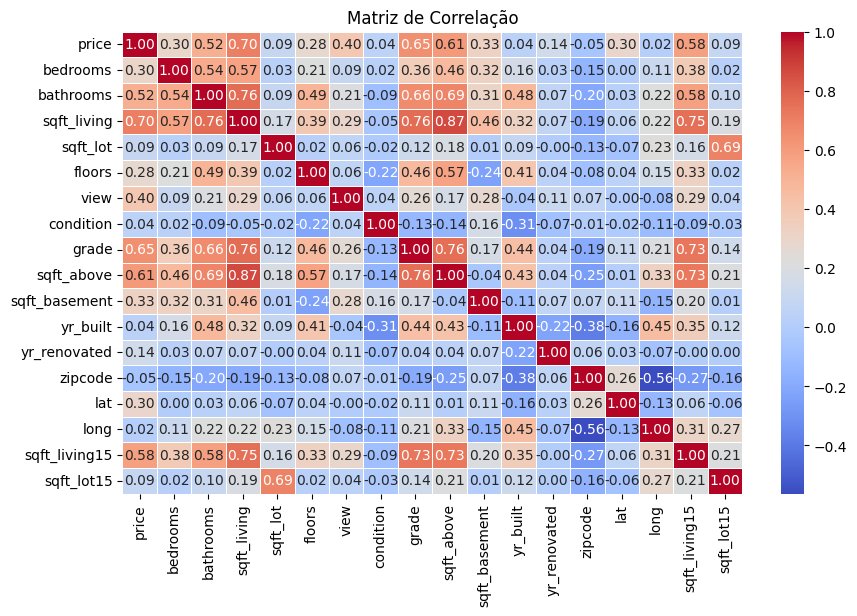

In [ ]:
#plot da matrix geral

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


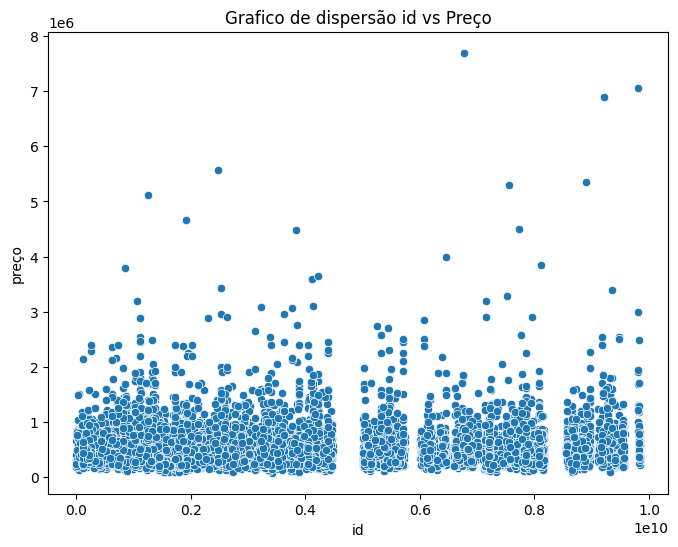

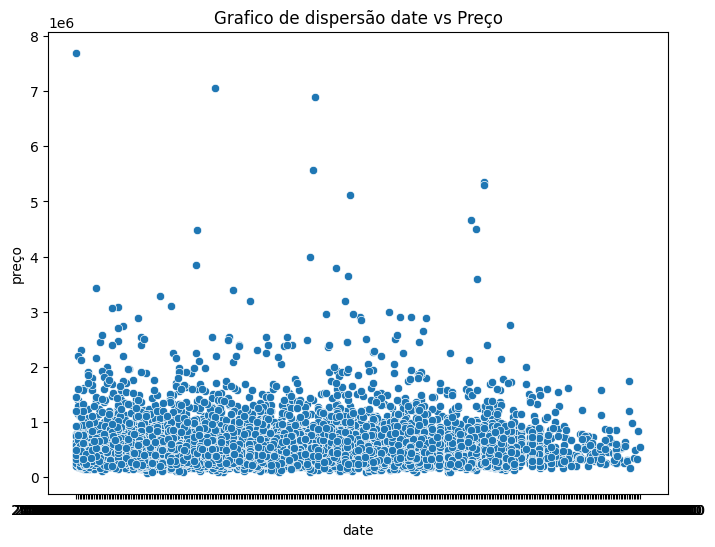

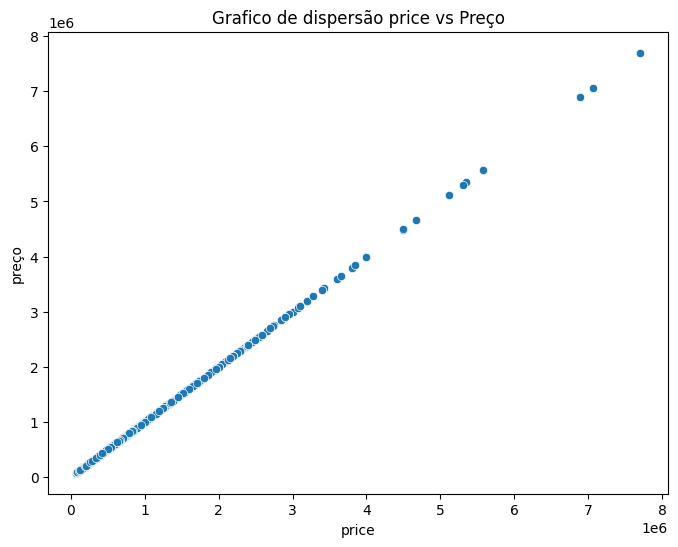

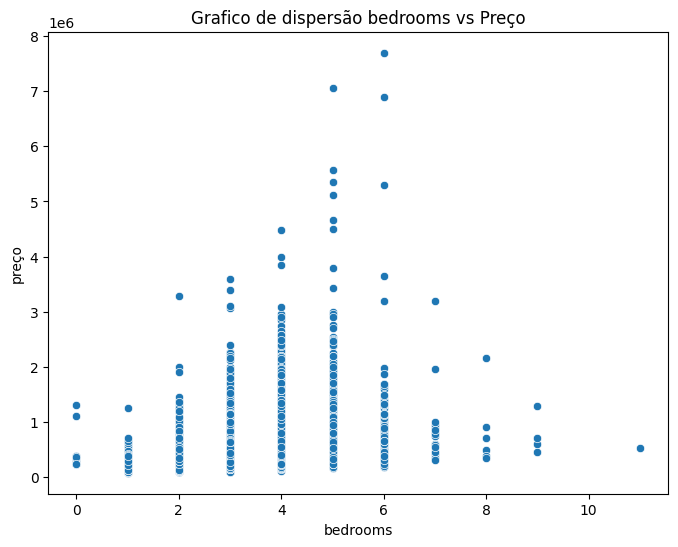

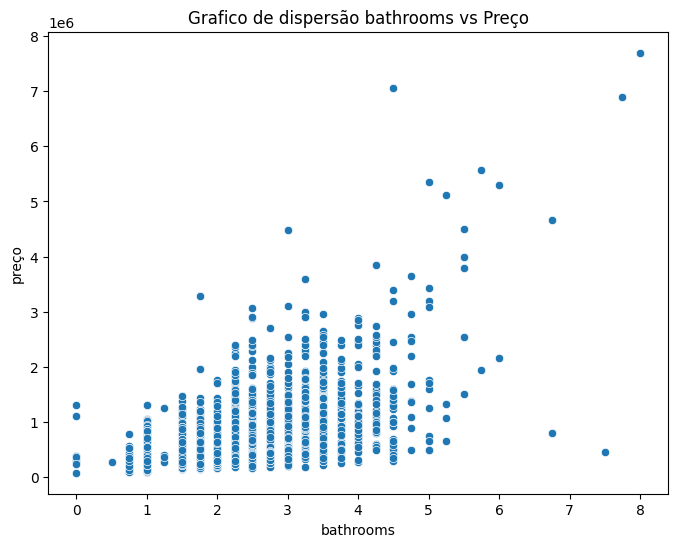

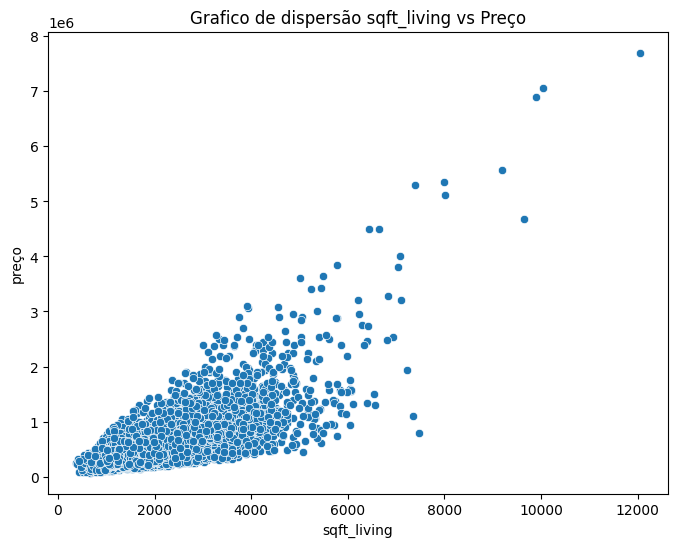

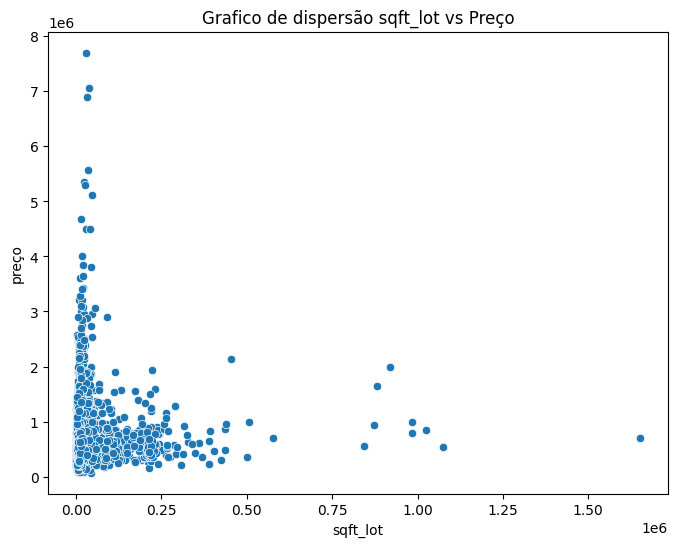

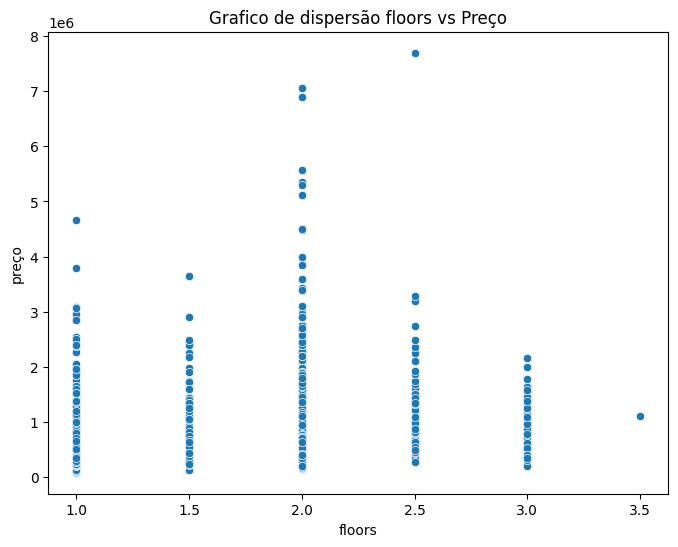

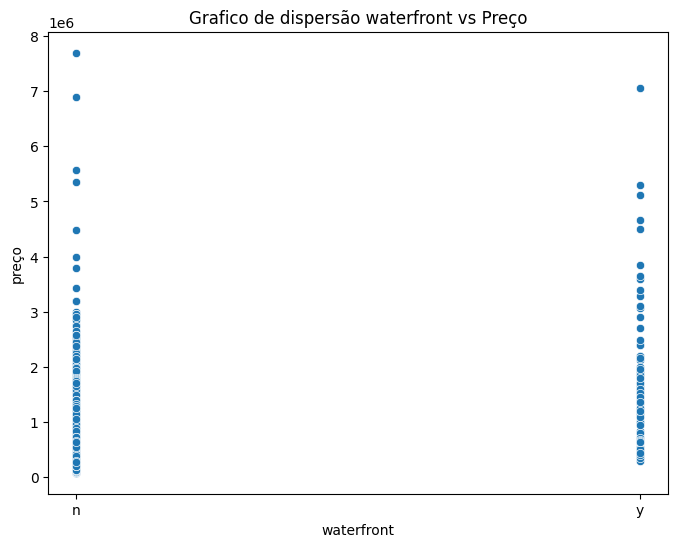

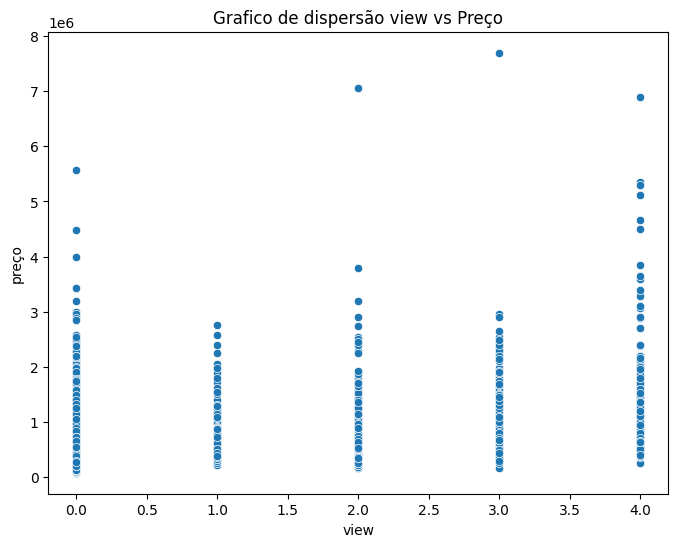

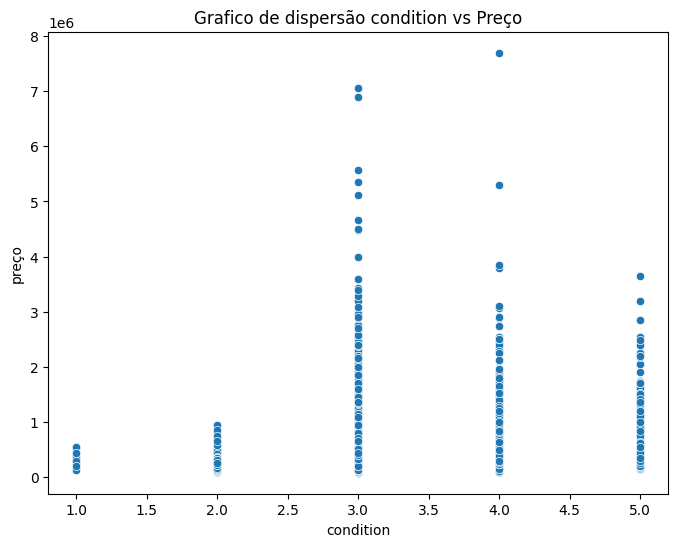

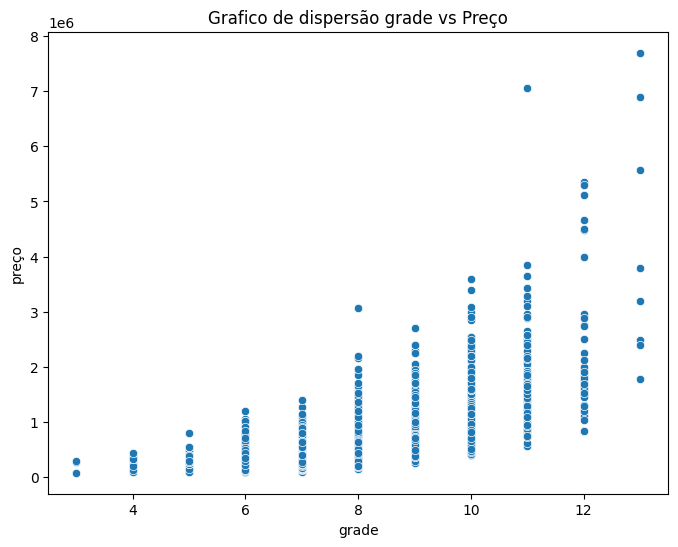

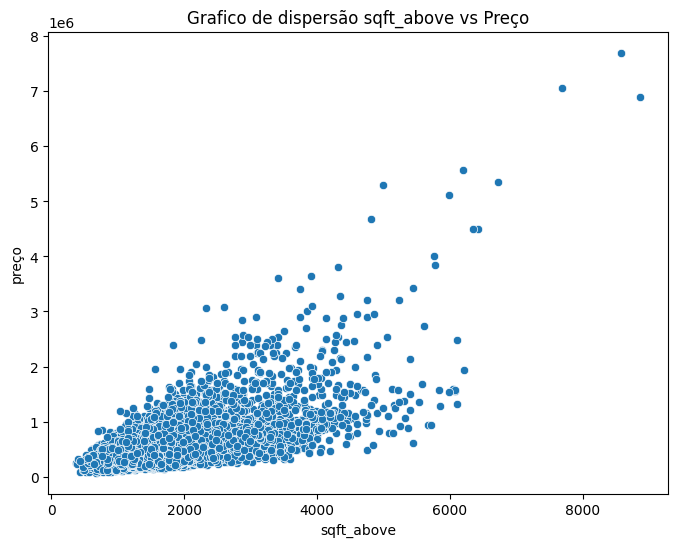

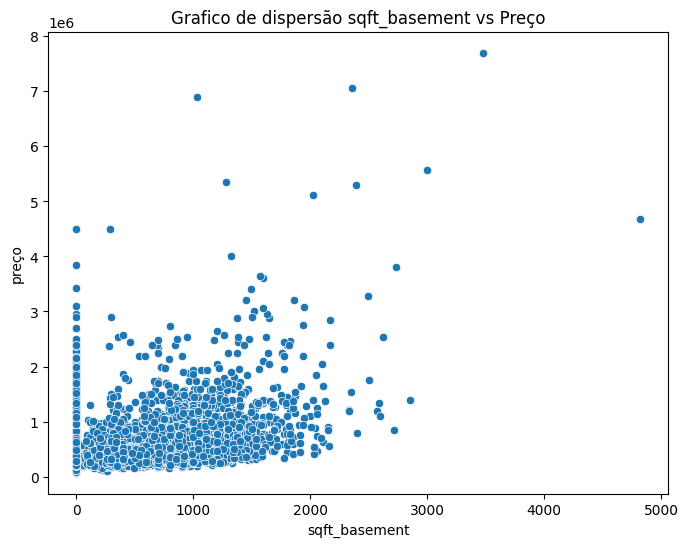

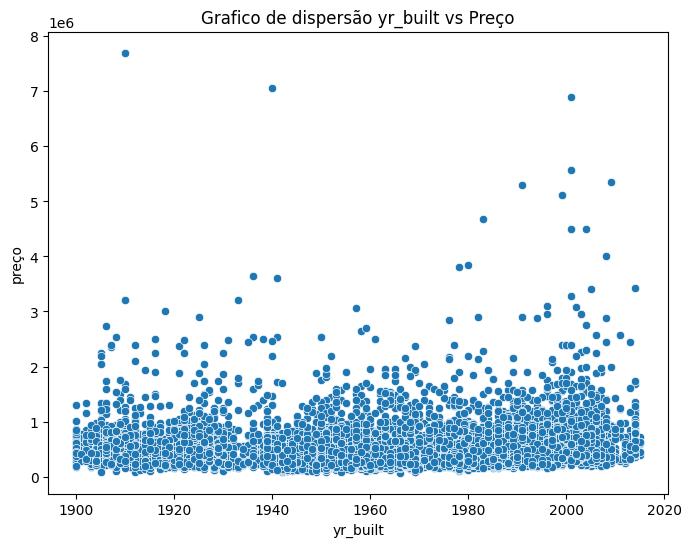

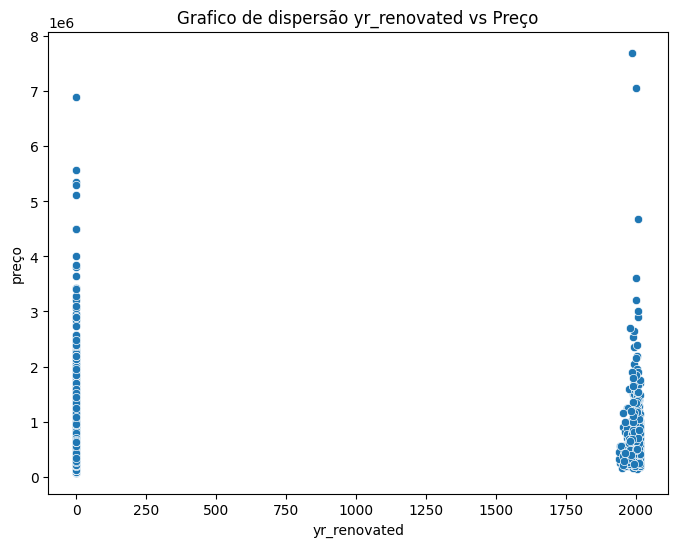

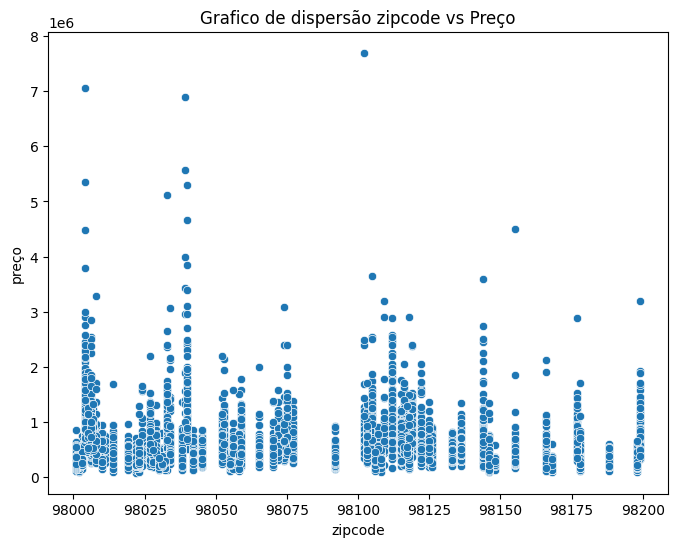

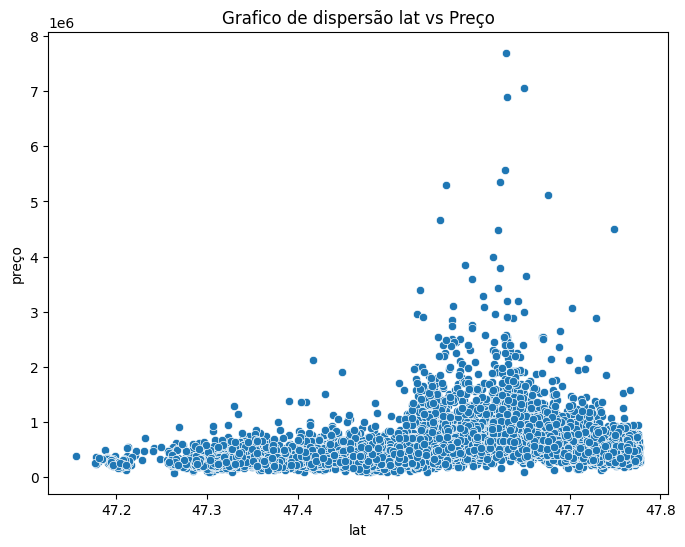

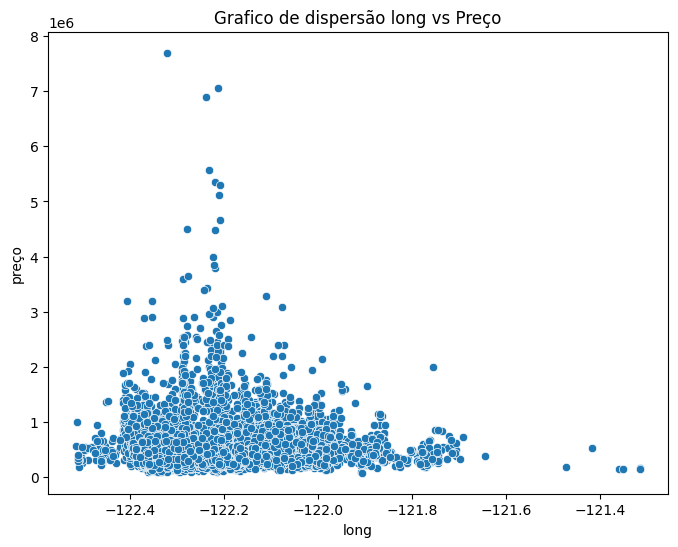

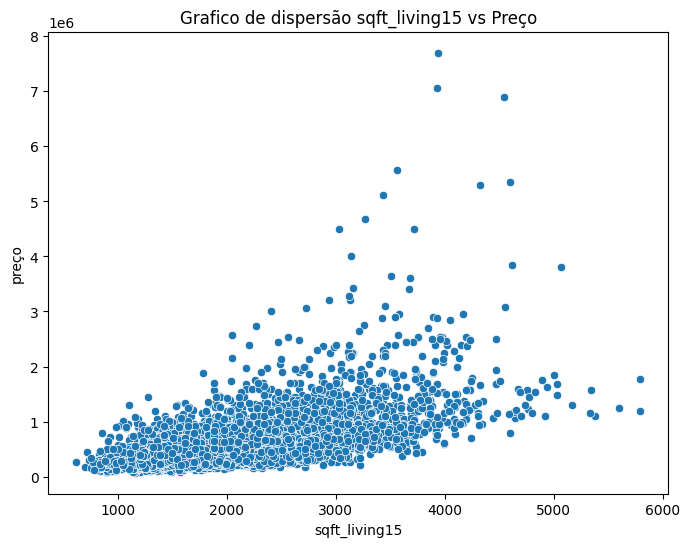

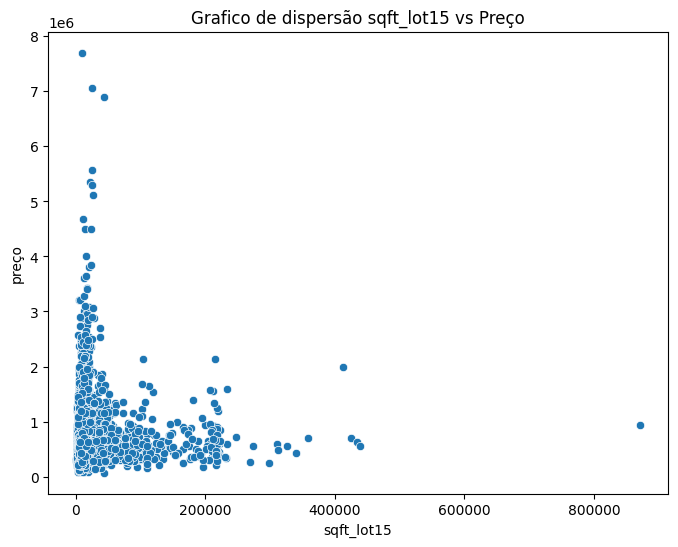

In [ ]:
for column in data_df.columns:
  plt.figure(figsize=[8,6])
  sns.scatterplot(data=data_df, x=column, y="price")
  plt.title(f'Grafico de dispersão {column} vs Preço')
  plt.xlabel(column)
  plt.ylabel("preço")
  plt.show()

***Qual é a correlação entre o preço price e o número de quartos bedrooms?***



A correlação entre price e bedrooms é de 0.30, o que indica que em geral casas com mais quartos tem um preço mais elevado.

**Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?**





In [ ]:
price_sqft_2000 = data_df[data_df['sqft_living'] > 2000] #filtrando  uma área total sqft_living superior a 2000 pés quadrados

corre = price_sqft_2000['price'].corr(price_sqft_2000['sqft_living'])

#calculo da matriz de correlação
corre

0.686378327915851

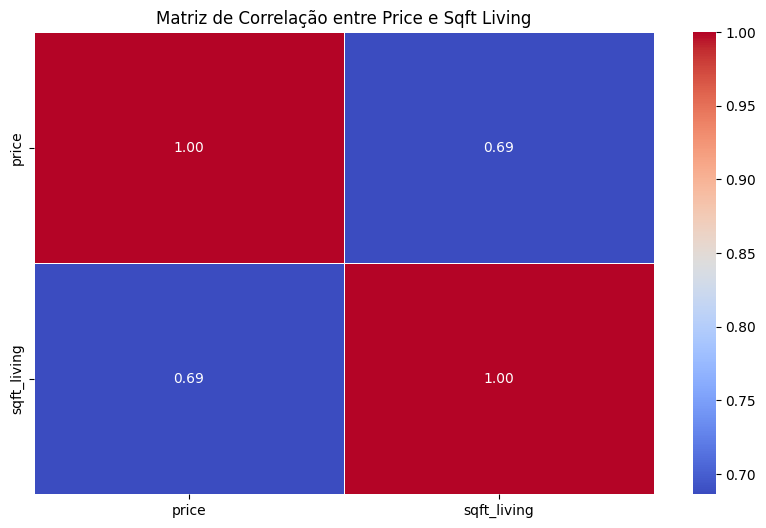

In [ ]:
correlacao = price_sqft_2000[['price', 'sqft_living']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Price e Sqft Living')
plt.show()

A correlação original é de 0.70. Ao analisarmos apenas casas com uma área total superior a 2000 pés quadrados, essa correlação é de 0.69. Portanto, a alteração é mínima em comparação com o valor original. Isso sugere que mesmo ao analisarmos uma área específica, a correlação entre o preço e a área total permanece forte. Além disso, podemos observar no gráfico de dispersão uma relação linear entre as duas variáveis, indicando que quando uma variável aumenta, a outra também tende a aumentar.

2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [ ]:
price_bathrooms = data_df[data_df['bathrooms'] == 2] # Filtrar casas com 2 banheiros
correlacao_bath_sqft = price_bathrooms['price'].corr(price_bathrooms['sqft_living']) # Correlação entre o preço (price) e a área total da casa (sqft_living)

print(f'A correlação entre o preço e a área total de casas com até 2 banheiros é de {correlacao_bath_sqft:.2f}. Isso sugere uma correlação moderada positiva entre as duas variáveis.')
print('Em outras palavras, à medida que a área total das casas aumenta, o preço tende a aumentar também, o que é uma associação esperada.')


A correlação entre o preço e a área total de casas com até 2 banheiros é de 0.45. Isso sugere uma correlação moderada positiva entre as duas variáveis.
Em outras palavras, à medida que a área total das casas aumenta, o preço tende a aumentar também, o que é uma associação esperada.


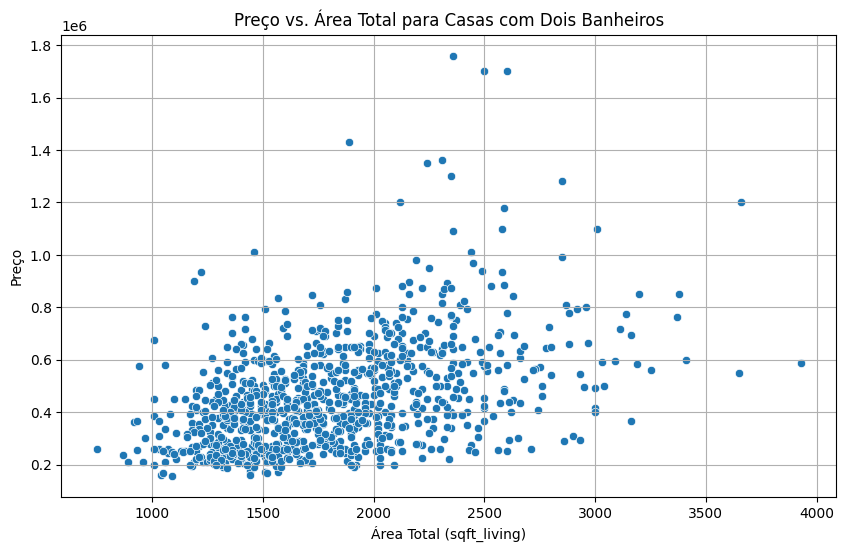

In [ ]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=price_bathrooms)
plt.xlabel('Área Total (sqft_living)')
plt.ylabel('Preço')
plt.title('Preço vs. Área Total para Casas com Dois Banheiros')
plt.grid(True)
plt.show()

*3*. ***Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?***

In [ ]:
# Calculando a matriz de correlação
correlacao_num_bath = data_df[['bathrooms', 'sqft_living', 'price']].corr()

print("Matriz de correlação:")
print(correlacao_num_bath)

Matriz de correlação:
             bathrooms  sqft_living     price
bathrooms     1.000000     0.764810  0.521193
sqft_living   0.764810     1.000000  0.702199
price         0.521193     0.702199  1.000000


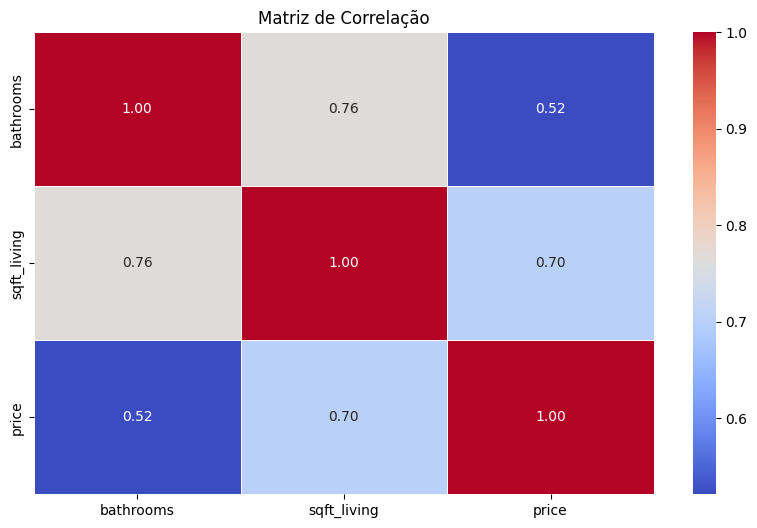

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(correlacao_num_bath, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

A correlação entre o número de banheiros (bathrooms) e a área total da casa (sqft_living) é de aproximadamente 0.764810. Isso sugere uma correlação moderadamente forte e positiva entre essas duas variáveis. Em outras palavras, casas com mais banheiros tendem a ter uma área total maior.

A correlação entre o número de banheiros (bathrooms) e o preço (price) é de aproximadamente 0.521193. Isso indica uma correlação moderada e positiva entre essas variáveis. Isso sugere que casas com mais banheiros tendem a ter preços mais altos.

A correlação entre a área total da casa (sqft_living) e o preço (price) é de aproximadamente 0.702199. Isso indica uma correlação moderadamente forte e positiva entre essas duas variáveis. Ou seja, casas com uma área total maior tendem a ter preços mais altos.

Esses resultados sugerem que a quantidade de banheiros tem uma influência significativa tanto na área total da casa quanto no preço. Além disso, a área total da casa também está fortemente correlacionada com o preço.

4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

In [ ]:
sqft_3000 = data_df[data_df['sqft_living'] > 3000]  # Filtrando casas com área total superior a 3000
correlacao_num_bath = sqft_3000[['condition', 'price']].corr()
correlacao_num_bath

,condition,price
condition,1.000000,0.105278
price,0.105278,1.000000


 Correlação de 0.105278 entre a condição da casa (condition) e o preço (price) indica uma correlação muito fraca entre essas duas variáveis. Ou seja, há pouca evidência de que a condição da casa tenha uma influência significativa no preço.

5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
three_bedrooms = data_df[data_df['bedrooms'] >= 3] # Filtrar casas com 3 quartos
correlacao_num_bedroom = three_bedrooms[['lat', 'price']].corr()
correlacao_num_bedroom

,lat,price
lat,1.000000,0.312555
price,0.312555,1.000000


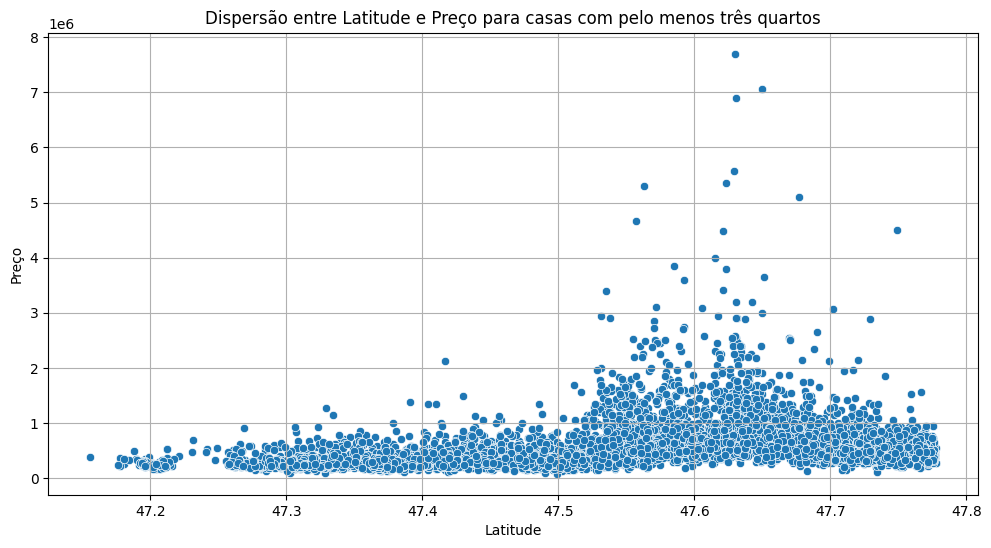

In [ ]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lat', y='price', data=three_bedrooms)
plt.xlabel('Latitude')
plt.ylabel('Preço')
plt.title('Dispersão entre Latitude e Preço para casas com pelo menos três quartos')
plt.grid(True)
plt.show()

Com um coeficiente de correlação de 0.31 entre a latitude (lat) e o preço (price) para casas com pelo menos três quartos (bedrooms), isso indica uma correlação positiva moderada. Isso sugere que existe uma relação mais forte entre a latitude da localização da casa e o preço, comparado ao exemplo anterior.

6. Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.

In [ ]:
from scipy.stats import f_oneway

In [ ]:
##verificar cardinalidade
data_df['waterfront'].nunique()

2

In [ ]:
# Separar os preços para propriedades com e sem vista para a água
preco_waterfront_n = data_df[data_df['waterfront'] == 'n']['price']
preco_waterfront_y = data_df[data_df['waterfront'] == 'y']['price']

# Realizar o teste ANOVA
resultado_anova = f_oneway(preco_waterfront_n, preco_waterfront_y)

print("Estatísticas do teste ANOVA:", resultado_anova)

Estatísticas do teste ANOVA: F_onewayResult(statistic=964.5733248785583, pvalue=2.97380815121432e-202)


Estatística F: A estatística F é de aproximadamente 964.57. Isso sugere que há uma diferença significativa nas médias dos preços das propriedades entre os grupos com e sem vista para a água.

Valor p: O valor p é muito próximo de zero (2.97e-202). Como esse valor p é significativamente menor que o nível de significância comumente usado de 0.05, temos evidências estatísticas suficientes para rejeitar a hipótese nula.

Portanto, com base neste resultado, podemos concluir que há uma diferença estatisticamente significativa nos preços das propriedades entre os grupos com e sem vista para a água. Em outras palavras, a presença de vista para a água tem um efeito significativo nos preços das propriedades.

**Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo:**

In [ ]:
car_df = pd.read_csv('car_price.csv')

In [ ]:
car_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [ ]:
car_df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [ ]:
def describe_new_data(car_df):
  df1 = car_df.describe()
  df1.loc['Amplitude']=df1.loc['max']-df1.loc['min']
  df1.loc['Variância']=df1.loc['std']*df1.loc['std']
  return df1
describe_new_data(car_df)

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000
Amplitude,3.495100e+07,34.000000,2.000000e+06,2470.000000,745.000000,782.000000,6.000000,90.000000
Variância,5.885914e+12,9.850038,3.456068e+09,190288.540413,17251.478265,18124.606556,0.651263,230.045460



Preço (Price):

O preço médio dos carros é de aproximadamente 1.718,279
comum desvio padrão de aproximadamente 2.426,090.

 O menor preço é  49000 e o maior preço é $ 35.000,000.

 A amplitude dos preços é de $ 34.951,000.

Isso sugere uma grande variação nos preços dos carros no conjunto de dados.

Ano de Fabricação (Year): A média do ano de fabricação dos carros é de aproximadamente 2016.71, com um desvio padrão de aproximadamente 3.14. O ano mínimo de fabricação é 1988 e o máximo é 2022.

Quilometragem (Kilometer): A quilometragem média dos carros é de aproximadamente 53,178 km, com um desvio padrão de aproximadamente 58,788 km. A quilometragem mínima é 0 km e a máxima é 2,000,000 km. A amplitude da quilometragem é de 2,000,000 km. Isso sugere uma grande variação na quilometragem dos carros no conjunto de dados.

Comprimento (Length), Largura (Width) e Altura (Height): As dimensões médias dos carros são aproximadamente 4281 mm de comprimento, 1768 mm de largura e 1589 mm de altura. O desvio padrão para comprimento, largura e altura é relativamente baixo, sugerindo que os carros tendem a ter dimensões consistentes.

Capacidade de Assentos (Seating Capacity): A média da capacidade de assentos dos carros é de aproximadamente 5.30, com um desvio padrão de aproximadamente 0.81. A capacidade mínima de assentos é 2 e a máxima é 8. A maioria dos carros parece ter capacidade para 5 assentos.

Capacidade do Tanque de Combustível (Fuel Tank Capacity): A média da capacidade do tanque de combustível dos carros é de aproximadamente 52.22 litros, com um desvio padrão de aproximadamente 15.17 litros. A capacidade mínima do tanque de combustível é 15 litros e a máxima é 105 litros.A maioria dos carros parece ter capacidade para cerca de 42 a 60 litros de combustível.

In [ ]:
car_df.isnull().sum() #verifica valores nulos

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.


In [ ]:

num_car = car_df.select_dtypes(include=['float64', 'int64']) #filtrei as variáveis numéricas e removi o  ID que é apenas uma identificação única para cada observação

#calculo da matriz de correlação

corr_car= num_car.corr()

In [ ]:
corr_car

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.309381,-0.147276,0.568875,0.577100,0.092968,-0.024879,0.586109
Year,0.309381,1.000000,-0.291740,0.085178,0.182220,0.126849,-0.000113,0.044859
Kilometer,-0.147276,-0.291740,1.000000,0.037817,0.008479,0.085728,0.111103,0.052447
Length,0.568875,0.085178,0.037817,1.000000,0.797228,0.194704,0.298527,0.809812
Width,0.577100,0.182220,0.008479,0.797228,1.000000,0.326928,0.229056,0.791316
Height,0.092968,0.126849,0.085728,0.194704,0.326928,1.000000,0.695373,0.408717
Seating Capacity,-0.024879,-0.000113,0.111103,0.298527,0.229056,0.695373,1.000000,0.313928
Fuel Tank Capacity,0.586109,0.044859,0.052447,0.809812,0.791316,0.408717,0.313928,1.000000


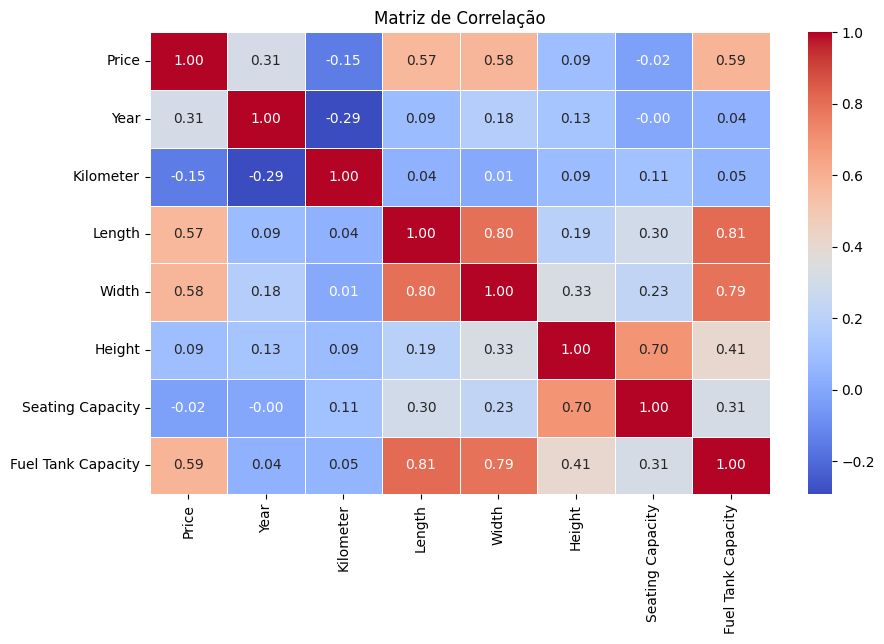

In [ ]:
#plot matrix

plt.figure(figsize=(10,6))
sns.heatmap(corr_car, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

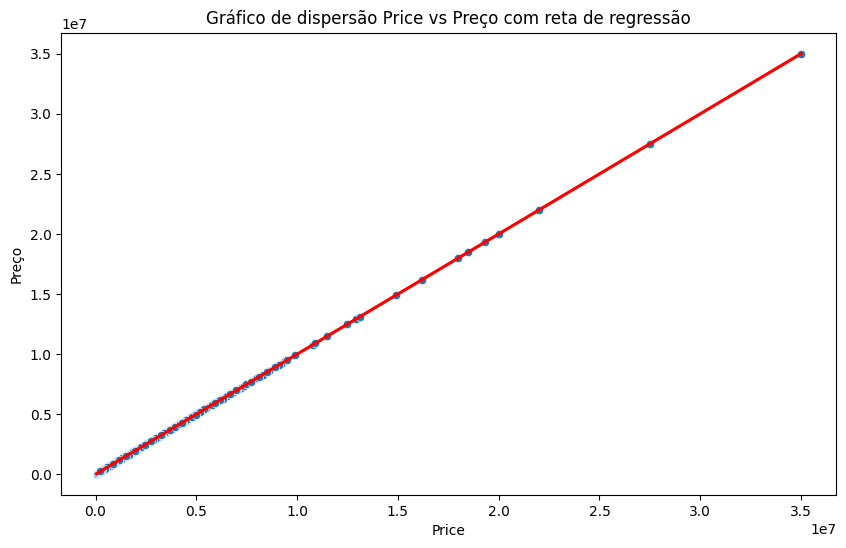

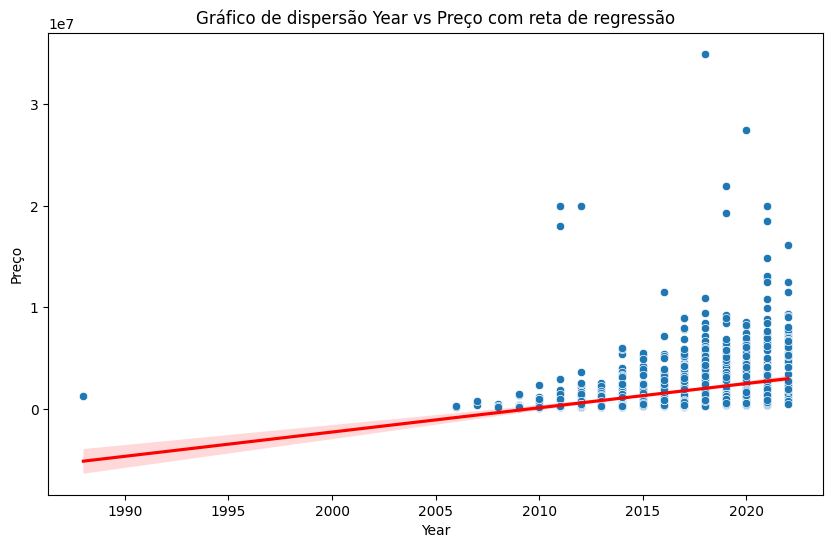

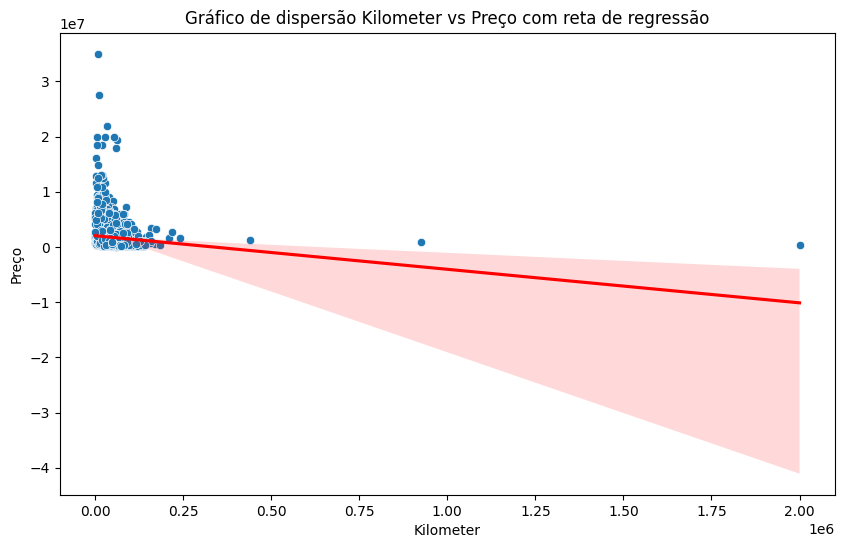

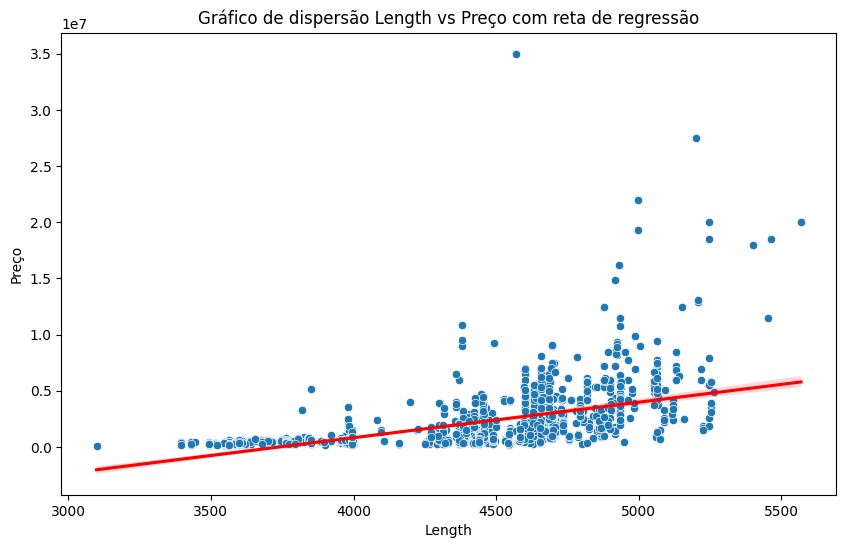

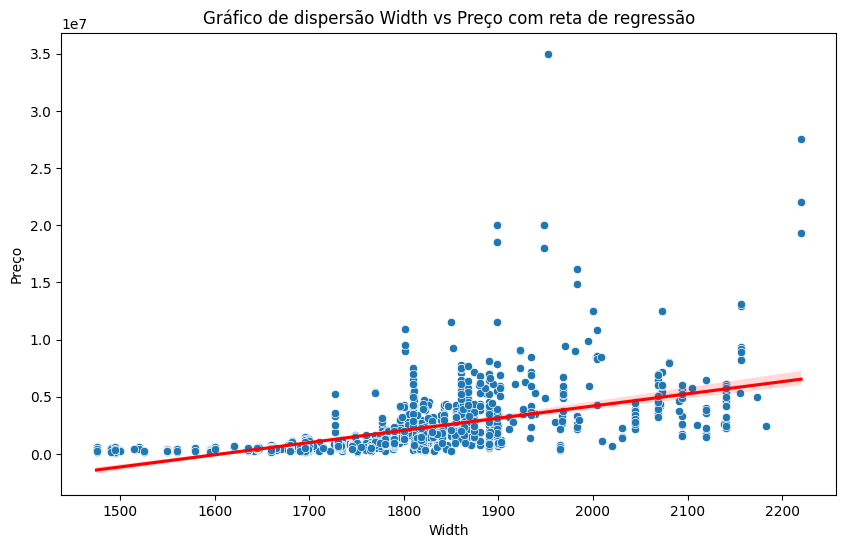

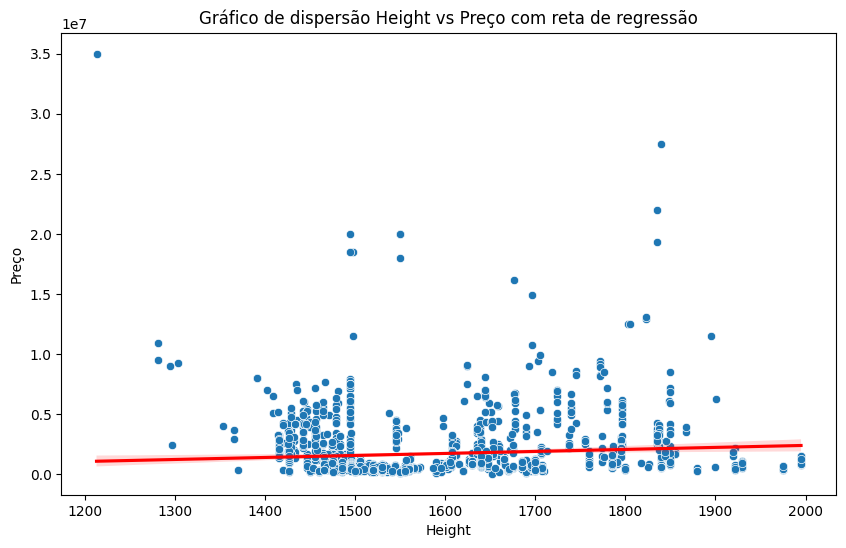

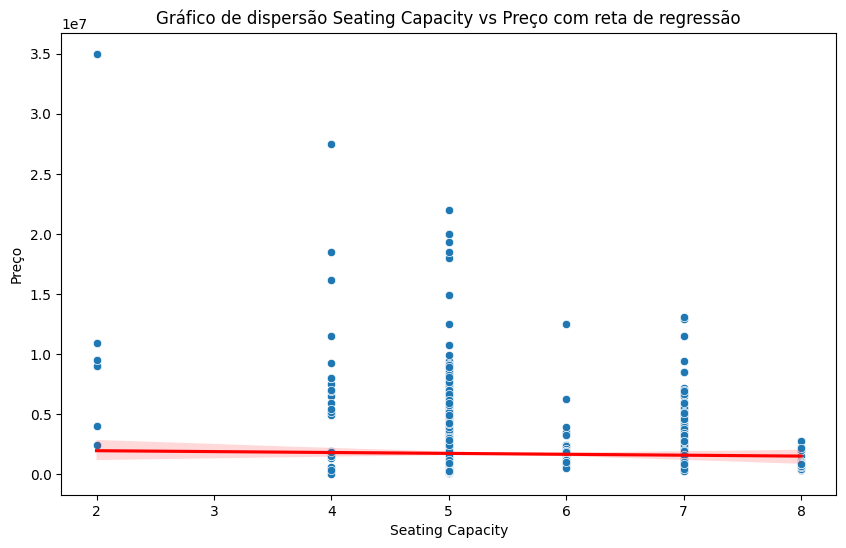

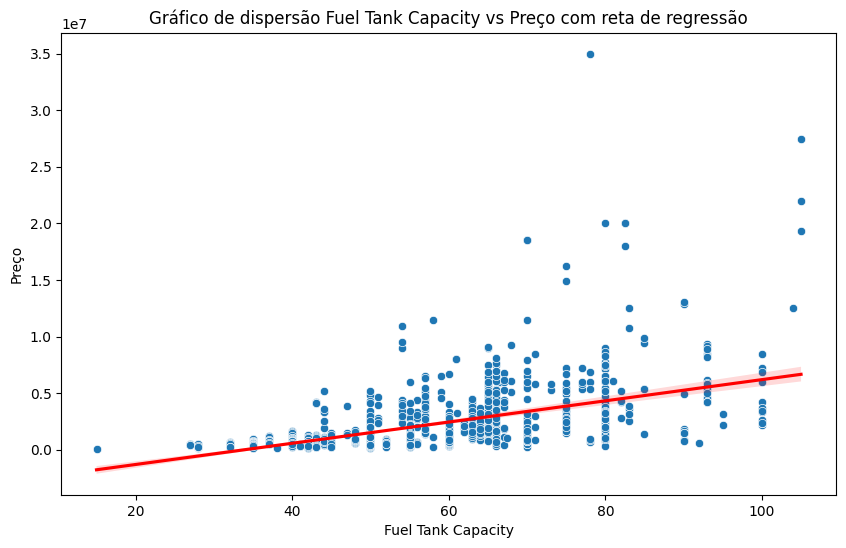

In [ ]:
for column in num_car.columns:
    plt.figure(figsize=[10,6])
    sns.scatterplot(data=num_car, x=column, y="Price")
    sns.regplot(data=num_car, x=column, y="Price", scatter=False, color='red')  # Adicionando a reta de regressão
    plt.title(f'Gráfico de dispersão {column} vs Preço com reta de regressão')
    plt.xlabel(column)
    plt.ylabel("Preço")
    plt.show()



# Correlaçao Negativa

No caso específico de "Preço" e "Quilometragem", a correlação negativa sugere que, em média, carros com maior quilometragem tendem a ter preços mais baixos.

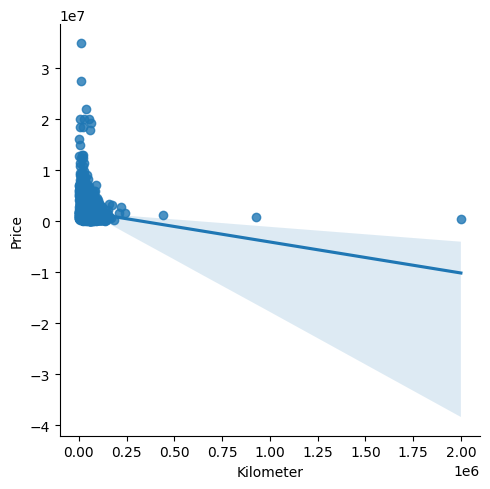

In [ ]:
sns.lmplot(x='Kilometer', y='Price',data=num_car)

Correlação Positiva

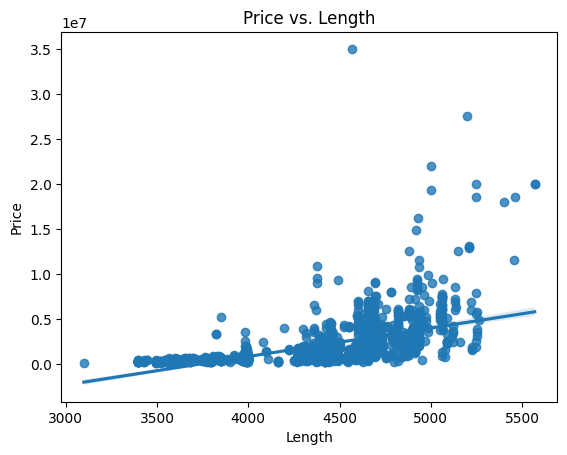

In [ ]:
sns.regplot(x='Length', y='Price', data=num_car)
plt.title('Price vs. Length')
plt.xlabel('Length')
plt.ylabel('Price')
plt.show()


# Correlação Neutra

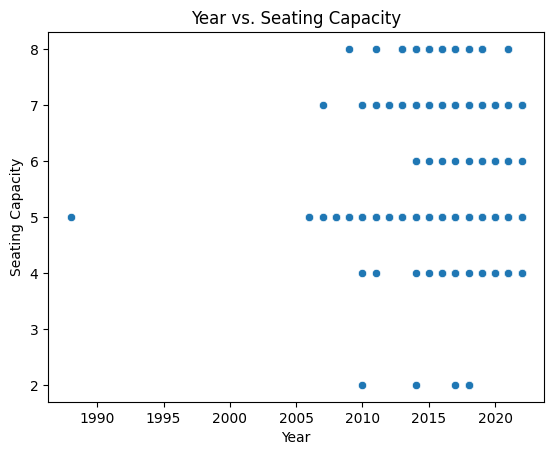

In [ ]:
sns.scatterplot(x='Year', y='Seating Capacity', data=num_car)
plt.title('Year vs. Seating Capacity')
plt.xlabel('Year')
plt.ylabel('Seating Capacity')
plt.show()


8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.


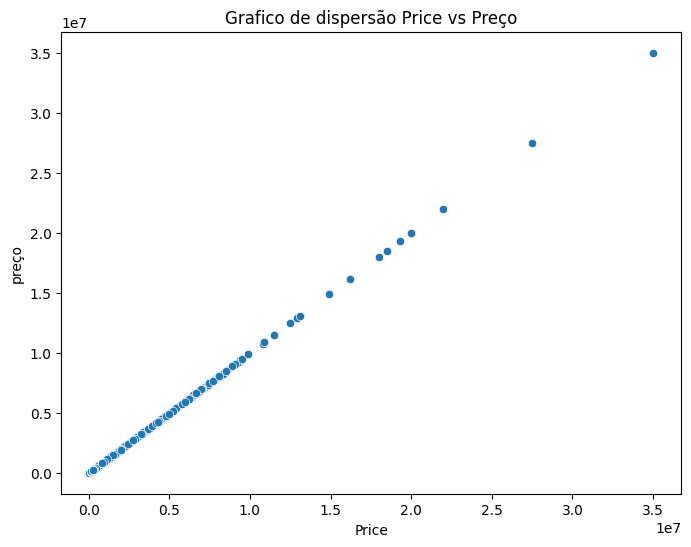

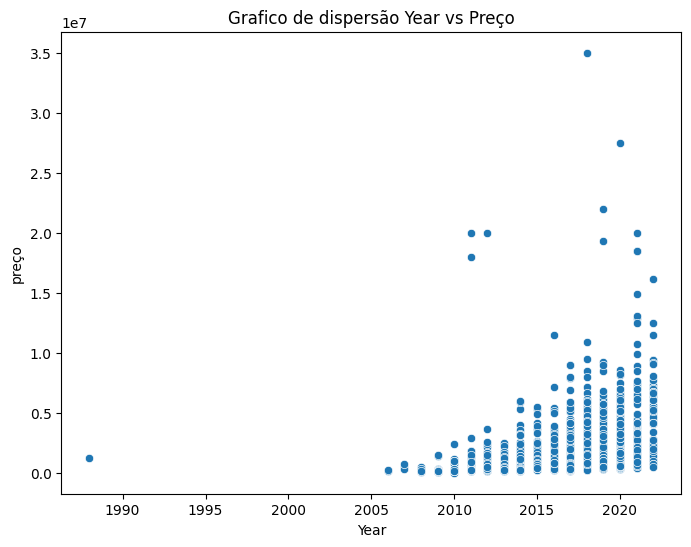

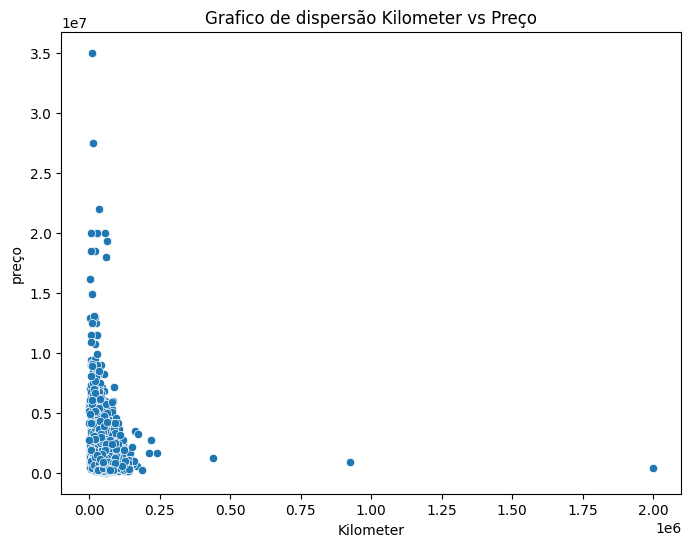

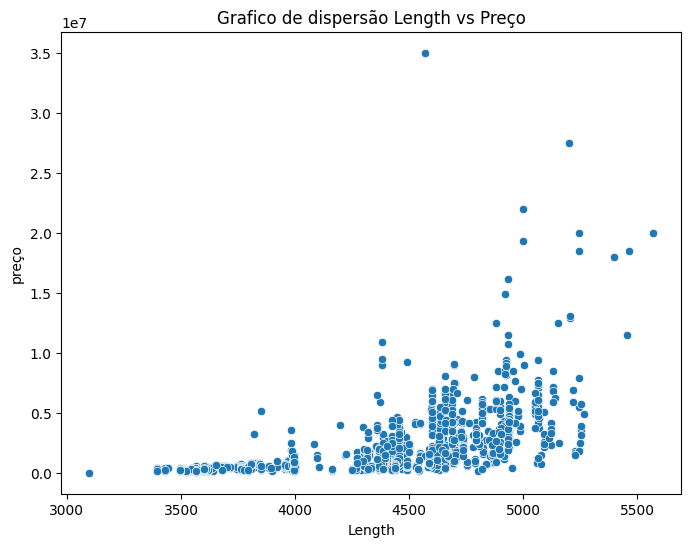

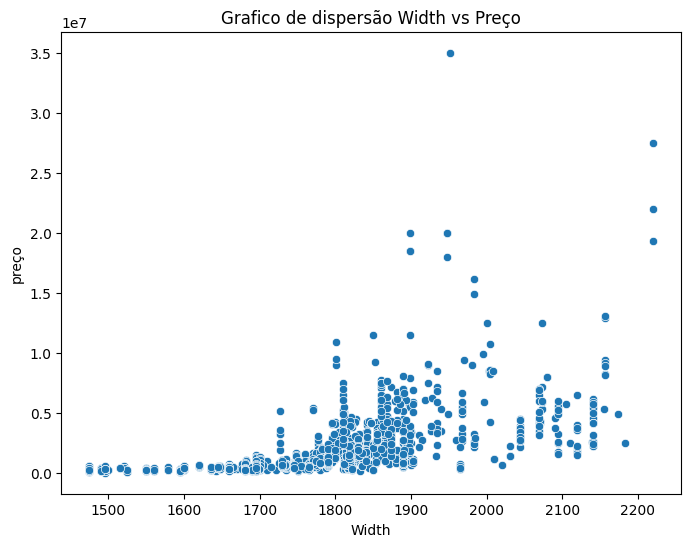

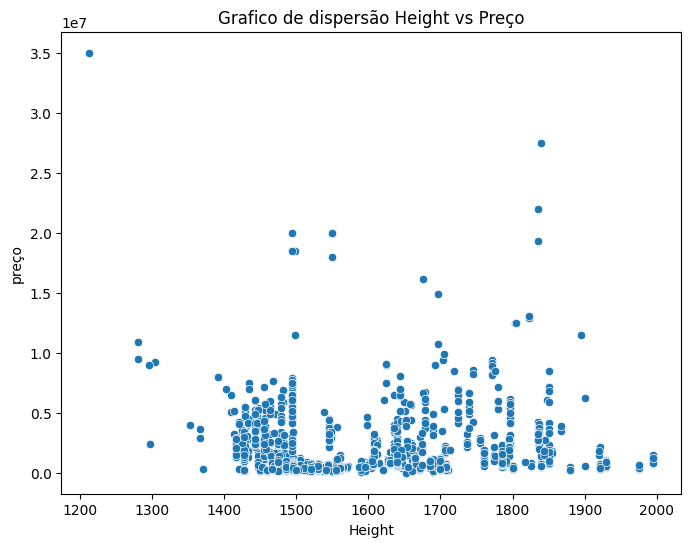

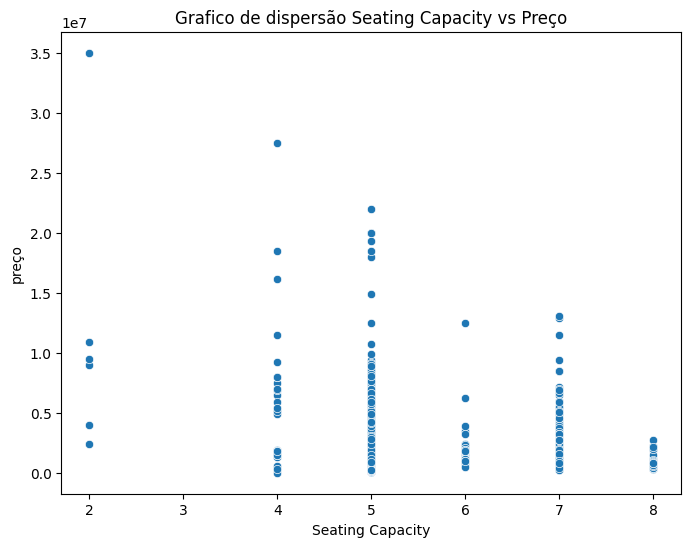

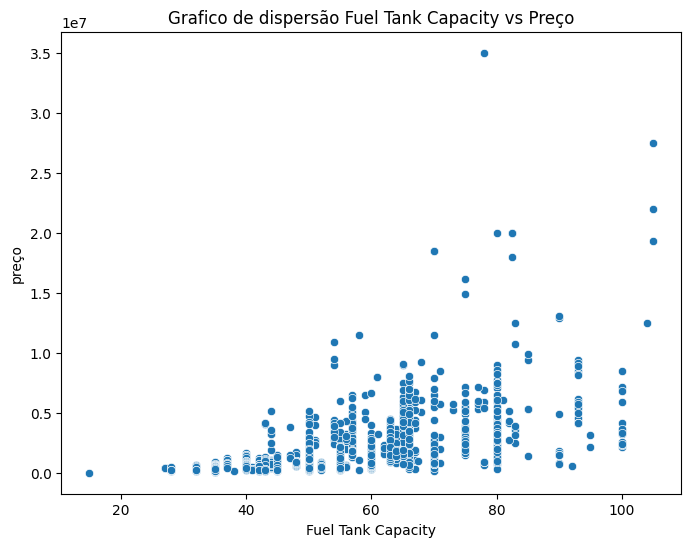

In [ ]:
for column in num_car.columns:
  plt.figure(figsize=[8,6])
  sns.scatterplot(data=num_car, x=column, y="Price")
  plt.title(f'Grafico de dispersão {column} vs Preço')
  plt.xlabel(column)
  plt.ylabel("preço")
  plt.show()

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.

In [ ]:
##importar o pacote
import statsmodels.api as sm

##define a variável explicativa e adiciona uma constante
X = sm.add_constant(num_car['Length'])

##define a varável de interesse

y=num_car['Fuel Tank Capacity']


In [ ]:
#fit do modelo: aqui o python irá calcular os valores de inteceptor e coeficiente angular estimados
model = sm.OLS(y, X).fit()

In [ ]:
##gera a tabela de regresão

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Fuel Tank Capacity   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     3567.
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        23:56:24   Log-Likelihood:                -6754.9
No. Observations:                1874   AIC:                         1.351e+04
Df Residuals:                    1872   BIC:                         1.352e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3368      2.029    -33.679      0.0

Tamanho do carro=−68.3368+0.0282×(Capacidade do tanque de combustivel)

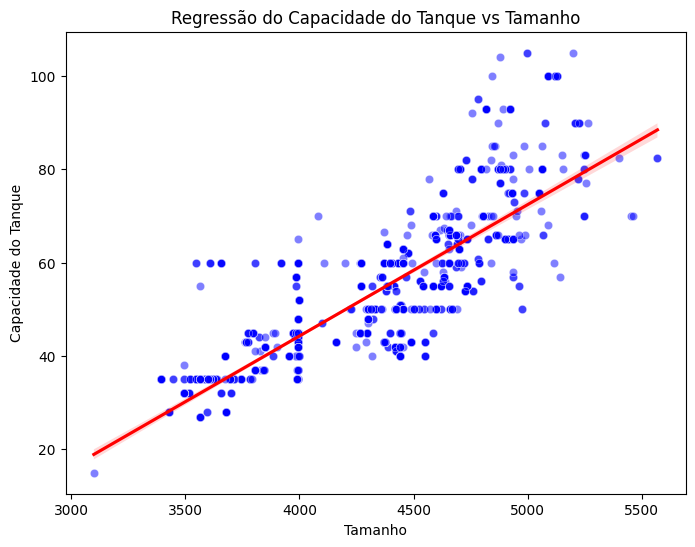

In [ ]:
## gerando o gráfco da reta estimada

plt.figure(figsize=(8,6))
sns.scatterplot(data=num_car,x='Length', y='Fuel Tank Capacity', color='blue', alpha=0.5)

## a funcao regplot gera a regressao e a plot da reta

sns.regplot(data=num_car,x='Length', y='Fuel Tank Capacity', scatter=False, color='red')

#titulos

plt.title('Regressão do Capacidade do Tanque vs Tamanho')
plt.xlabel('Tamanho')
plt.ylabel('Capacidade do Tanque')
plt.show()

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.


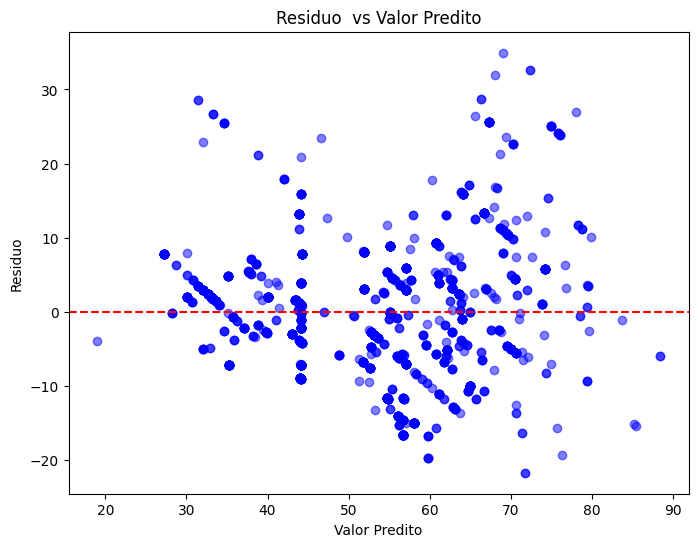

In [ ]:
#salva o dado  do residuo
residuals = model.resid
#calcula o valor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8,6))
plt.scatter(predicted_values, residuals, color ='blue', alpha=0.5)

#adicionar linha
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuo  vs Valor Predito')
plt.xlabel('Valor Predito')
plt.ylabel('Residuo')

plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

In [ ]:
# Selecionar todas as variáveis correlacionadas com 'Price' no DataFrame corr_car, incluindo 'Price'
selected_variables = corr_car[(corr_car['Price'] > 0.5) | (corr_car['Price'] < -0.5)].index.tolist()

# Remover 'Price' da lista selecionada, pois será nossa variável dependente
selected_variables.remove('Price')

# Adicionar a variável 'Price' à lista selecionada
selected_variables.append('Price')

# Filtrar as variáveis no DataFrame num_car
selected_df = corr_car[selected_variables]


In [ ]:
selected_df

,Length,Width,Fuel Tank Capacity,Price
Price,0.568875,0.577100,0.586109,1.000000
Year,0.085178,0.182220,0.044859,0.309381
Kilometer,0.037817,0.008479,0.052447,-0.147276
Length,1.000000,0.797228,0.809812,0.568875
Width,0.797228,1.000000,0.791316,0.577100
Height,0.194704,0.326928,0.408717,0.092968
Seating Capacity,0.298527,0.229056,0.313928,-0.024879
Fuel Tank Capacity,0.809812,0.791316,1.000000,0.586109


In [ ]:

# Selecionar as variáveis independentes manualmente
X = num_car[['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']]

# Adicionar constante ao conjunto de dados (intercepto)
X = sm.add_constant(X)

# Variável dependente
y = num_car['Price']

# Ajustar o modelo de regressão
model = sm.OLS(y, X).fit()

# Exibir a tabela de regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Mon, 13 May 2024   Prob (F-statistic):          1.49e-278
Time:                        23:59:20   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

Todos os coeficientes, exceto o da altura (Height), são estatisticamente significativos (P < 0.05). Isso sugere que todas as variáveis, exceto a altura, têm um efeito significativo no preço do veículo.

Considerando esses resultados, pode ser útil remover a variável 'Height' do modelo, pois não é estatisticamente significativa e não contribui para explicar o preço do veículo. Isso poderia ajudar a melhorar a interpretação e a qualidade do modelo.

In [ ]:

# Selecionar as variáveis independentes manualmente removendo a altura
X = num_car[['Year', 'Kilometer', 'Width', 'Seating Capacity', 'Fuel Tank Capacity']]

# Adicionar constante ao conjunto de dados (intercepto)
X = sm.add_constant(X)

# Variável dependente
y = num_car['Price']

# Ajustar o modelo de regressão
model = sm.OLS(y, X).fit()

# Exibir a tabela de regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     358.8
Date:                Mon, 13 May 2024   Prob (F-statistic):          6.61e-270
Time:                        23:29:01   Log-Likelihood:                -29579.
No. Observations:                1874   AIC:                         5.917e+04
Df Residuals:                    1868   BIC:                         5.920e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.589e+08   2.76

R² (coeficiente de determinação):
O R² é uma medida que varia entre 0 e 1, representando a proporção da variabilidade dos preços dos carros explicada pelas variáveis incluídas no modelo.

Neste caso, o R² é de aproximadamente 0.494, o que significa que cerca de 49.4% da variação nos preços dos carros pode ser explicada pelas variáveis independentes (como ano de fabricação, quilometragem, largura, etc.) presentes no modelo.

Coeficientes das variáveis:
Os coeficientes de cada variável no modelo mostram como o preço do carro é afetado por uma mudança unitária naquela variável, mantendo todas as outras constantes.

Por exemplo, o coeficiente para 'Year' é de aproximadamente 185200. Isso significa que, se o ano de fabricação do carro aumentar em um ano, podemos esperar um aumento de cerca de 185200 unidades monetárias no preço do carro, todas as outras coisas sendo iguais.

Da mesma forma, o coeficiente para 'Kilometer' é de aproximadamente -3.3223. Isso sugere que, para cada quilômetro adicional percorrido pelo carro, podemos esperar uma redução de cerca de 3.3223 unidades monetárias no preço do carro, mantendo todas as outras variáveis constantes.

Significância estatística:
Os valores P (P>|t|) associados a cada coeficiente indicam se a variável é estatisticamente significativa para prever os preços dos carros.
Quanto menor o valor P, mais significativa é a variável. Neste modelo, todas as variáveis têm valores P muito baixos (próximos de zero), indicando que todas são estatisticamente significativas.

Interpretação geral:
Considerando todos os coeficientes e seus valores P, podemos concluir que as variáveis incluídas no modelo têm um impacto significativo nos preços dos carros.

Por exemplo, o ano de fabricação, a quilometragem, a largura, a capacidade de assentos e a capacidade do tanque de combustível são fatores importantes que influenciam os preços dos carros.
Assim, este modelo nos fornece insights úteis sobre como diferentes características dos carros afetam seus preços no mercado.

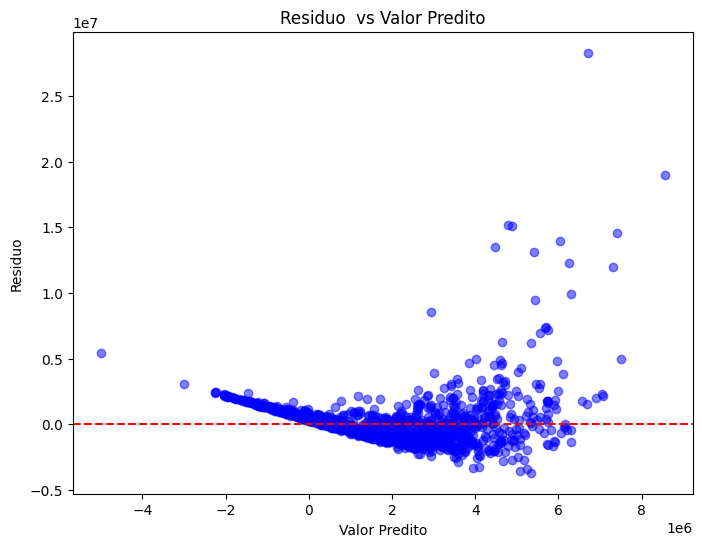

In [ ]:
#salva o dado  do residuo
residuals = model.resid
#calcula o valor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8,6))
plt.scatter(predicted_values, residuals, color ='blue', alpha=0.5)

#adicionar linha
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuo  vs Valor Predito')
plt.xlabel('Valor Predito')
plt.ylabel('Residuo')

plt.show()